In [52]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

In [3]:
X = df.iloc[:, :4].values
Y = df.iloc[:, -1].values
classes = np.unique(Y)


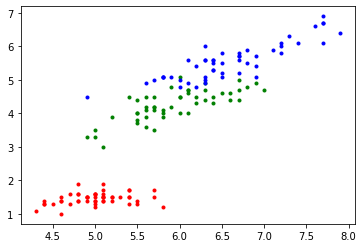

In [4]:
colors = dict(zip(classes, ['.r', '.g', '.b']))
for c in classes:
  idx = Y == c
  plt.plot(X[idx, 0], X[idx, 2], colors[c])

In [78]:
itrain = np.r_[0:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]
Xtrain, Ytrain = X[itrain], Y[itrain]
Xtest, Ytest = X[itest], Y[itest]

-----------------------
Kernel :  linear
C :  2.8000000000000003
Acc :  0.9866666666666667
support len :  12.0
-----------------------
Kernel :  poly
C :  0.5
Acc :  0.9866666666666667
support len :  14.0
-----------------------
Kernel :  rbf
C :  2.7
Acc :  0.9866666666666667
support len :  27.0


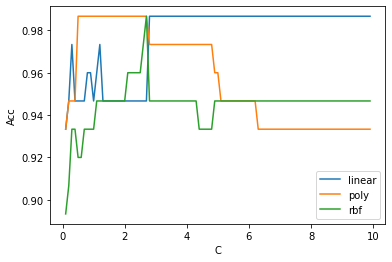

In [90]:
c = np.arange(0.1,10,0.1)
kernel = ['linear', 'poly', 'rbf']
for k in kernel:
  acc_l = np.array([])
  sp_l = np.array([])
  for i in c:
    clf = SVC(C=i,kernel=k)
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    #acc = np.sum(Ztest==Ytest)/len(Ztest)*100
    acc = accuracy_score(Ytest, y_pred) #np.sum(Ztest==Ytest)/len(Ztest)*100
    acc_l = np.append(acc_l,acc)
    sp_l = np.append(sp_l,len(clf.support_))
    #print()
  index = np.argmax(acc_l)
  #print(k,c[index],acc_l[index])
  print('-----------------------')
  print('Kernel : ',k)
  print('C : ',c[index])
  print('Acc : ',acc_l[index])
  print('support len : ',sp_l[index])
  plt.xlabel('C')
  plt.ylabel('Acc')
  plt.plot(c, acc_l, label=k)
  plt.legend()

-----------------------
Kernel :  precomputed
C :  2.8000000000000003
Acc :  0.9866666666666667


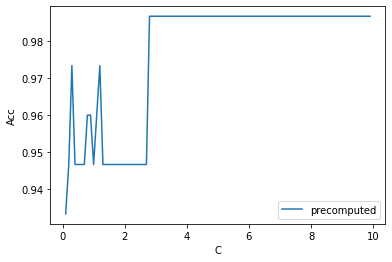

In [80]:
c = np.arange(0.1,10,0.1)
kernel = ['precomputed']
for k in kernel:
  acc_l = np.array([])
  for i in c:
    clf = SVC(C=i,kernel=k)
    kernel_train = np.dot(Xtrain, Xtrain.T)  # linear kernel
    clf.fit(kernel_train, Ytrain)

    kernel_test = np.dot(Xtest, Xtrain.T)
    y_pred = clf.predict(kernel_test)

    acc = accuracy_score(Ytest, y_pred) #np.sum(Ztest==Ytest)/len(Ztest)*100

    acc_l = np.append(acc_l,acc)

  index = np.argmax(acc_l)
  #print(k,c[index],acc_l[index])
  print('-----------------------')
  print('Kernel : ',k)
  print('C : ',c[index])
  print('Acc : ',acc_l[index])
  plt.xlabel('C')
  plt.ylabel('Acc')
  plt.plot(c, acc_l, label=k)
  plt.legend()

-----------------------
Kernel :  sigmoid
C :  0.1
Acc :  0.05333333333333334


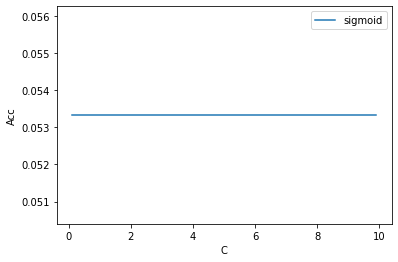

In [81]:
c = np.arange(0.1,10,0.1)
kernel = ['sigmoid']
for k in kernel:
  acc_l = np.array([])
  for i in c:
    clf = SVC(C=i,kernel=k)
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    #acc = np.sum(Ztest==Ytest)/len(Ztest)*100
    acc = accuracy_score(Ytest, y_pred) #np.sum(Ztest==Ytest)/len(Ztest)*100
    acc_l = np.append(acc_l,acc)
  index = np.argmax(acc_l)
  #print(k,c[index],acc_l[index])
  print('-----------------------')
  print('Kernel : ',k)
  print('C : ',c[index])
  print('Acc : ',acc_l[index])
  plt.xlabel('C')
  plt.ylabel('Acc')
  plt.plot(c, acc_l, label=k)
  plt.legend()

-----------------------
Kernel :  sigmoid
C :  0.1
Acc :  0.02666666666666667


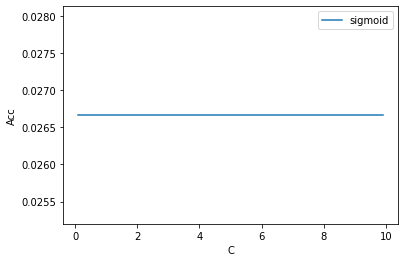

In [75]:
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix

sepal_length = Xtrain
sepal_width = Xtrain

c = np.arange(0.1,10,0.1)
kernel = ['sigmoid']
for k in kernel:
  acc_l = np.array([])
  for i in c:
    clf = SVC(C=i,kernel=k,gamma='auto')

    #normalizing features
    sepal_length_norm = normalize(sepal_length.reshape(1, -1))[0]
    sepal_width_norm = normalize(sepal_width.reshape(1, -1))[0]

    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    #acc = np.sum(Ztest==Ytest)/len(Ztest)*100
    acc = accuracy_score(Ytest, y_pred) #np.sum(Ztest==Ytest)/len(Ztest)*100
    # print(confusion_matrix(Ytest, y_pred))
    # print(classification_report(Ytest, y_pred))

    acc_l = np.append(acc_l,acc)
  index = np.argmax(acc_l)
  #print(k,c[index],acc_l[index])
  print('-----------------------')
  print('Kernel : ',k)
  print('C : ',c[index])
  print('Acc : ',acc_l[index])
  plt.xlabel('C')
  plt.ylabel('Acc')
  plt.plot(c, acc_l, label=k)
  plt.legend()